![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
# import 4 standar must have libraries in python for data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [91]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [92]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [93]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [94]:
sal['BasePay'].min()

-166.01

In [95]:
sal['BasePay'].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [96]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [97]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [98]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here

sal[sal['EmployeeName'] == 'GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [99]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [100]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [101]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]
# The person is in dept rather than being paid, weird. Maybe wrong data had been input
# This dataset is very large, and the number of invalid number like this is unlikely to be large.
# We can just simply remove all records with weird value like this

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [102]:
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [103]:
len(sal['JobTitle'].unique())

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [104]:
sal['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [105]:
sum(sal[ sal['Year'] == 2013]['JobTitle'].value_counts() == 1)

202

**How many people have the word Chief in their job title?**

In [106]:
method1 = sum(sal['JobTitle'].str.lower().str.contains('chief'))
# Using attribute string of dataframe to access string function like lower and contains
# After using a string function, the type is back as dataframe thus we include another .str to use contains after convert all string value to lower case
print('Method 1 give the result of: ', method1)


Method 1 give the result of:  627


In [107]:
# One approach is to use contains only. The contains is like re library, we will add option to ignore case sensitive
method2 = sum(sal['JobTitle'].str.contains('(?i)chief'))
print('Method 2 give the result of: ', method2)

Method 2 give the result of:  627


In [108]:
# (?1) is part of re library, if having troble remembering this, we can simply use keyword case = False
method3 = sum(sal['JobTitle'].str.contains('chief', case = False))
print('Method 3 give the result of: ', method3)

Method 3 give the result of:  627


## Data Visualization

**Implement seaborn's countplot with x='Year'**

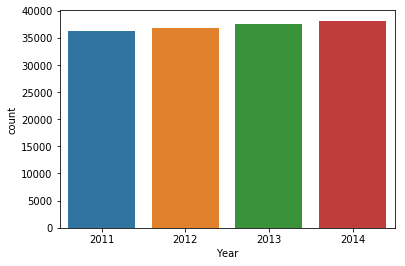

In [109]:
sns.countplot(x='Year', data = sal)

**Implement seaborn's distplot for BasePay of Year 2011**

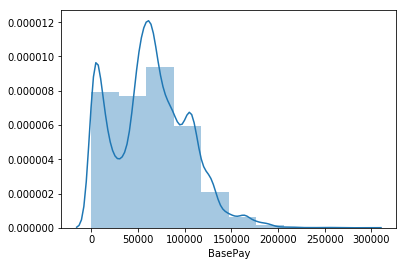

In [110]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay'], bins = 10)


**How about other Year**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


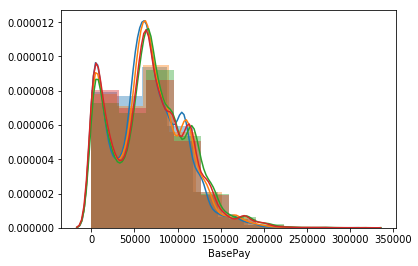

In [111]:
'''
plot all distribution in single figure so really ugly
'''

unique_vals = sal['Year'].unique()  # Get all unique value in year
# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [sal.loc[sal['Year'] == val] for val in unique_vals]
# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target['BasePay'], bins = 10)

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [112]:
# After looking closely at the dataset
# We do not really need columns: id, notes, agency, status
# First lets drop these columns for faster performance query
sal_updated = sal.drop(["Id", "Notes", "Status", "Agency"], axis = 1)
# After carefully inspect, we observe that there are some records with empty space or blank
# Lets turn all these to NAN
sal_updated.replace(r'^\s*$', np.nan, regex=True)
# Now lets drop all NAN record, since this dataset is large and the emty record is relatively small
sal_no_nan = sal_updated.dropna()
sal_no_nan.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36160,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012
36162,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012


In [113]:
# Since all job must be paid with valid positive number
# Let's delete all records with base pay < 0. Ovetime pay < 0??? I dunno, maybe valid. 
# For simplicity sake, let's just keep valid value strictly to base pay only.
columns = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits"]
sal_no_nan.sort_values(by = columns)
sal_valid = sal_no_nan[sal_no_nan['BasePay'] > 0]
sal_valid.head()
# Weird, the results not sort by ascending by what we want but we remove all invalid base pay so it's ok
# Let's just assume all information here are calculated correctly. Otherwise we will need to filter again. What a pain

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36160,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012
36162,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012


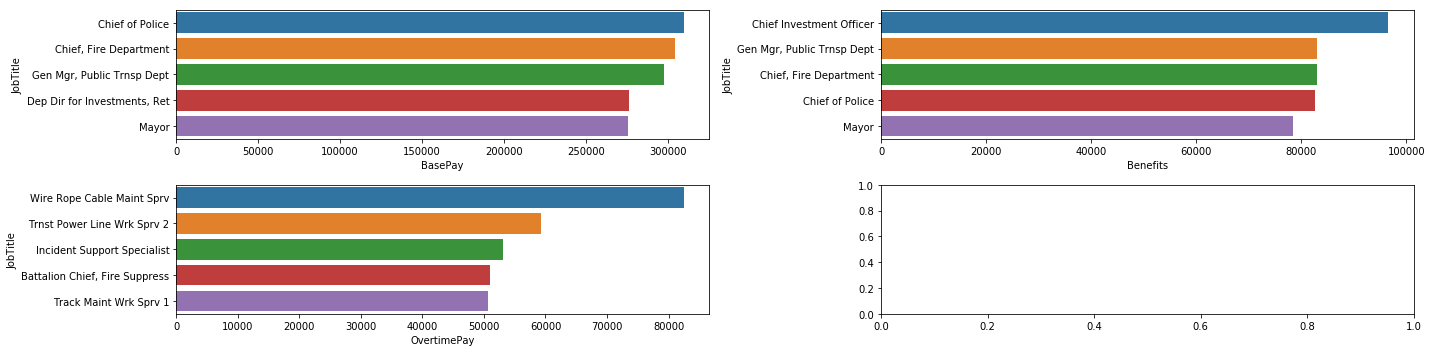

In [114]:
# Group by jobtitle
sal_group = sal_valid.groupby(by = ["JobTitle"], as_index = False)
# Here we get a new object pd after groupby, we will use mean to sort. Using old one to group seems not working, so we create new df. Print new df only result in 'DataFrameGroupBy' object
# We will us subplot with 2 columns 2 rows to see better
fig, ((axis1, axis2), (axis3,axis4)) = plt.subplots(2, 2, figsize=(20,5))
sns.barplot(x = "BasePay", y = "JobTitle", data = sal_group.mean().sort_values(by = "BasePay", ascending = False).head(), ax = axis1)
sns.barplot(x = "Benefits", y = "JobTitle", data = sal_group.mean().sort_values(by = "Benefits", ascending = False).head(), ax = axis2)
sns.barplot(x = "OvertimePay", y = "JobTitle", data = sal_group.mean().sort_values(by = "OvertimePay", ascending = False).head(), ax = axis3)
fig.tight_layout() # This will fit the size

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [115]:
sal_valid['length'] = sal_valid['JobTitle'].str.len()
sal_valid.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,length
BasePay,1.000000,0.274797,0.289849,0.916535,0.954414,0.966154,0.010107,-0.022335
OvertimePay,0.274797,1.000000,0.319456,0.297506,0.513401,0.473697,0.013234,-0.022054
OtherPay,0.289849,0.319456,1.000000,0.243198,0.475280,0.430941,-0.007123,-0.074594
Benefits,0.916535,0.297506,0.243198,1.000000,0.881791,0.928698,-0.044700,-0.021683
TotalPay,0.954414,0.513401,0.475280,0.881791,1.000000,0.993819,0.010491,-0.035646
TotalPayBenefits,0.966154,0.473697,0.430941,0.928698,0.993819,1.000000,-0.002273,-0.033131
Year,0.010107,0.013234,-0.007123,-0.044700,0.010491,-0.002273,1.000000,0.011538
length,-0.022335,-0.022054,-0.074594,-0.021683,-0.035646,-0.033131,0.011538,1.000000


In [0]:
# Hmmm. Dunno, there seems to be no correlation, maybe i'm wrong, so who knows?????

# Great Job!